**Exploratory Data Analysis: PowerCo**


Datasets used:

i)**hist:** https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044685365/client_data

ii)**main:** https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044717433/price_data



*   Dataset **"hist"** cintains: 
id: contact id price_date: reference dateprice_p1_var: price of energy for the 1st period price_p2_var: price of energy for the 2nd periodprice_p3_var: price of energy for the 3rd period price_p1_fix: price of power for the 1st periodprice_p2_fix: price of power for the 2nd period *price_p3_fix: price of power for the 3rd period

*   Dataset **"main"** contains: id, contact id
    activity_new: category of the company's activity. 419 unique values, remove NaN
    campaign_disc_elec: code of the electricity campaign the customer last subscribed to. 0 non-null
    channel_sales: code of the sales channel
    cons_12m: electricity consumption of the past 12 months
    cons_gas_12m: gas consumption of the past 12 months
    cons_last_month: electricity consupmtion of the last month
    date_activ: date of activation of the contract
    date_end: registered date of the end of the contract
    date_first_activ: date of first contract of the client
    date_modif_prod: date of last modification of the product
    date_renewal: date of the next contract renewal
    forecast_base_bill_ele: forecasted electricity bill baseline for next month
    forecast_base_bill_year: forecasted electricity bill baseline for calendar year
    forecast_bill_12m: forecasted electricity bill baseline for 12 months
    forecast_cons: forecasted electricity consumption for next month
    forecast_cons_12m: forecasted electricity consumption for next 12 months
    forecast_cons_year: forecasted electricity consumption for next calendar year
    forecast_discount_energy: forecasted value of current discount
    forecast_meter_rent_12m: forecasted bill of meter rental for the next 12 months
    forecast_price_energy_p1: forecasted energy price for 1st period
    forecast_price_energy_p2: forecasted energy price for 2nd period
    forecast_price_pow_p1: forecasted power price for 1st period
    has_gas: indicated if client is also a gas client
    imp_cons: current paid consumption
    margin_gross_pow_ele: gross margin on power subscription
    margin_net_pow_ele: net margin on power subscription
    nb_prod_act: number of active products and services
    net_margin: total net margin
    num_years_antig: antiquity of the client (in number of years)
    origin_up: code of the electricity campaign the customer first subscribed to
    pow_max: subscribed power



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore as zscore

In [4]:
# list of dates
date_list = ['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']
# Read in dataset
main = pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044685365/client_data.csv")
hist = pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044717433/price_data.csv", parse_dates=['price_date'])

**Historical Pricing Data:**

In [ ]:
hist.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
hist.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


**Observations:**


*   Average energy price increased in 2nd period, then decreased in 3rd
*   Average power price was highest in 1st period, fell in 2nd and 3rd
*   **Outliers may be present** as there is large variation between average and maximum values









In [ ]:
hist.isnull()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
192997,False,False,False,False,False,False,False,False
192998,False,False,False,False,False,False,False,False
192999,False,False,False,False,False,False,False,False
193000,False,False,False,False,False,False,False,False


**Historical Customer Data:**

In [ ]:
main.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [ ]:
main.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
main.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

There are **no null values**. Thus, we can go ahead with further analysis without worrying about missing datapoints.

**Plotting a heatmap:**

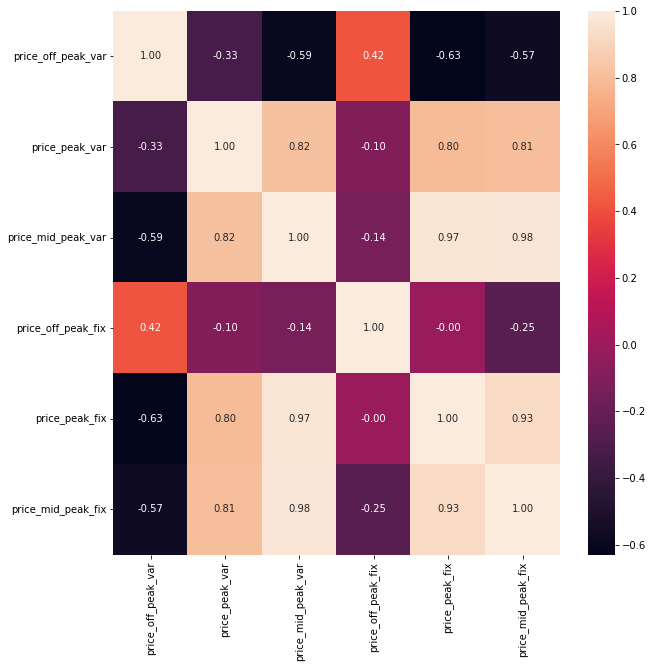

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(hist.corr(),annot=True,fmt='.2f')
plt.show()

In [ ]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(df_main)
print("Numerical Features")
print(numeric_columns)

print("===="*20)



# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df_main)
print("Categorical Features:")
print(categorical_columns)

Numerical Features
   cons_12m  cons_gas_12m  cons_last_month  ...  num_years_antig  pow_max  churn
0         0         54946                0  ...                3   43.648      1
1      4660             0                0  ...                6   13.800      0
2       544             0                0  ...                6   13.856      0
3      1584             0                0  ...                6   13.200      0
4      4425             0              526  ...                6   19.800      0

[5 rows x 18 columns]
Categorical Features:
                                 id  ...                         origin_up
0  24011ae4ebbe3035111d65fa7c15bc57  ...  lxidpiddsbxsbosboudacockeimpuepw
1  d29c2c54acc38ff3c0614d0a653813dd  ...  kamkkxfxxuwbdslkwifmmcsiusiuosws
2  764c75f661154dac3a6c254cd082ea7d  ...  kamkkxfxxuwbdslkwifmmcsiusiuosws
3  bba03439a292a1e166f80264c16191cb  ...  kamkkxfxxuwbdslkwifmmcsiusiuosws
4  149d57cf92fc41cf94415803a877cb4b  ...  kamkkxfxxuwbdslkwifmmcsiusiuosws


**Plotting a graph for churn:**

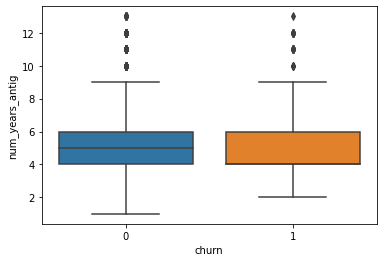

In [ ]:
target=main["churn"]

ax = sns.boxplot(y="num_years_antig", x=target, data=main)

**Observation:**


*   **Average age** for customer churn is **4 years**.

In [ ]:
main.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False)

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1461977.57
kamkkxfxxuwbdslkwifmmcsiusiuosws     664274.11
ldkssxwpmemidmecebumciepifcamkci     620281.40
MISSING                               17567.91
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64

**Selecting customers with a positive margin:**

In [ ]:
top_customers = main.loc[(main['churn']>=0) & (main['net_margin']>0),['id','num_years_antig','net_margin']]

top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
2596,fb7dcb0f4e0dc4ee54874eab2607c4da,3,24570.65
10718,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
12348,818b8bca0a9d7668252d46b978169325,4,4346.37
7794,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
3861,e8948a5469344e9ad0dfcacbb705f709,4,3768.16
12624,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65
14274,6c2d7343c53156d1f6ec797be3bf22af,4,3403.27
1316,6f918b83d4a565c165a4ac842d724a2b,4,3323.02
4876,9590c7a6100ae76ec078aa177ffb8d0d,3,3215.03
3478,e7bdc7743d73a9bf94cc3c6a293fca93,4,2711.19


Since most of these customers are in the average churn age i.e., 4, higher priority should mainly be given to them.